<a href="https://colab.research.google.com/github/riteshrohilla/AppliedMachineLearning/blob/main/01_Flights_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("/content/flights.csv")

df.head()



,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [ ]:
# Your code to explore the data


In [5]:
print(df.isnull().sum())


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


In [6]:

df['DepDel15'].fillna(df['DepDel15'].mode()[0], inplace=True)
df['ArrDel15'].fillna(df['ArrDel15'].mode()[0], inplace=True)
df.isnull().sum()


,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Carrier,0
OriginAirportID,0
OriginAirportName,0
OriginCity,0
OriginState,0
DestAirportID,0


# New Section

# New Section

In [7]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_cleaned = remove_outliers(df, 'DepDelay')
df_cleaned = remove_outliers(df_cleaned, 'ArrDelay')

df.shape[0], df_cleaned.shape[0]


(271940, 231247)

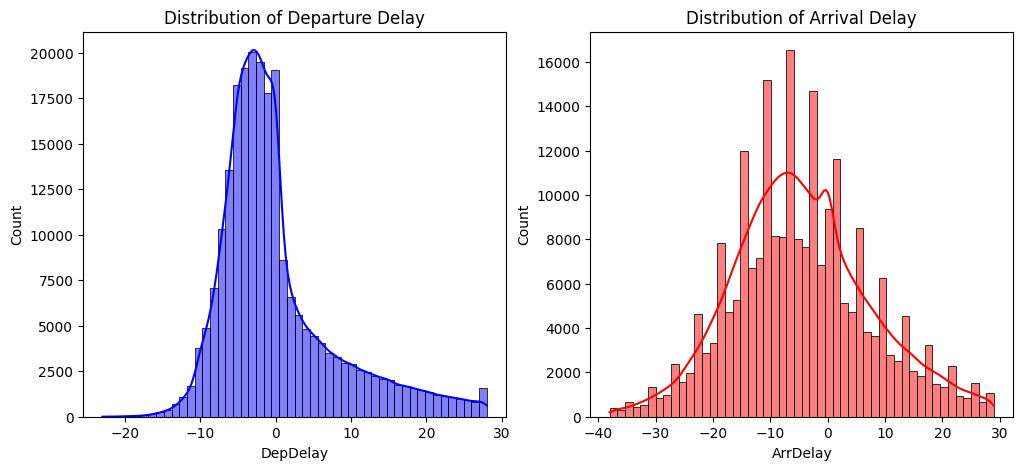

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,231247.0,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000
mean,2013.0,7.021721,15.800490,3.904150,12756.934983,12737.101121,1291.456300,0.217659,0.076010,1473.366054,-4.505373,0.087020,0.012307
std,0.0,2.004542,8.851392,1.997062,1509.030249,1504.878492,470.252867,7.853408,0.265014,488.005050,12.098459,0.281864,0.110253
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-38.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.000000,1100.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1247.000000,-2.000000,0.000000,1455.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1855.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,29.000000,1.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

summary_stats = df_cleaned.describe()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["DepDelay"], bins=50, kde=True, color="blue")
plt.title("Distribution of Departure Delay")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["ArrDelay"], bins=50, kde=True, color="red")
plt.title("Distribution of Arrival Delay")

plt.show()

summary_stats


           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  231247.0  231247.000000  231247.000000  231247.000000    231247.000000   
mean     2013.0       7.021721      15.800490       3.904150     12756.934983   
std         0.0       2.004542       8.851392       1.997062      1509.030249   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  231247.000000  231247.000000  231247.000000  231247.000000   
mean    12737.101121    1291.456300       0.217659       0.076010   
std      1504.878492     470.252867       7.853408       0.2650

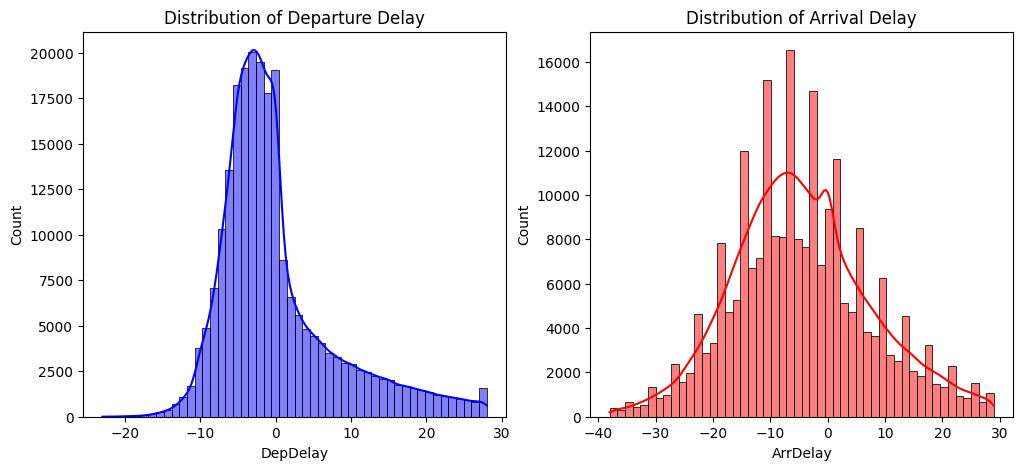

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary_stats = df_cleaned.describe()
print(summary_stats)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["DepDelay"], bins=50, kde=True, color="blue")
plt.title("Distribution of Departure Delay")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned["ArrDelay"], bins=50, kde=True, color="red")
plt.title("Distribution of Arrival Delay")

plt.show()
